# Clustering
## 성적 군집화

In [109]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [110]:
df = pd.read_csv(r'D:\git_space\data\grade.csv')
df

,name,midterm,final,attendance,attitude,homework
0,Ronaldo,90,94,10,8,8
1,Son,85,90,10,9,8
2,Messi,98,97,10,9,10
3,Dybala,75,70,8,8,9
4,Griezmann,70,65,8,7,7
5,Benzema,82,90,8,7,7
6,Neymar,95,91,7,5,8
7,Mbappe,90,97,9,9,9
8,Sancho,64,70,7,8,9
9,Pogba,59,45,4,5,6


In [111]:
df.isnull().sum()

name          0
midterm       0
final         0
attendance    0
attitude      0
homework      0
dtype: int64

## PCA

In [112]:
df.drop('name', axis=1, inplace=True)
df

,midterm,final,attendance,attitude,homework
0,90,94,10,8,8
1,85,90,10,9,8
2,98,97,10,9,10
3,75,70,8,8,9
4,70,65,8,7,7
5,82,90,8,7,7
6,95,91,7,5,8
7,90,97,9,9,9
8,64,70,7,8,9
9,59,45,4,5,6


In [113]:
features = df

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import MeanShift

In [115]:
meanshift = MeanShift(bandwidth=18) # bandwidth를 16으로 설정해보니 cluster가 다섯 개 형성된다
cluster_labels = meanshift.fit_predict(features)
print(np.unique(cluster_labels))

[0 1 2 3 4]


In [116]:
df_scaled = StandardScaler().fit_transform(features)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [117]:
df['cluster'] = cluster_labels
df['component1'] = df_pca[:, 0]
df['component2'] = df_pca[:, 1]
df

,midterm,final,attendance,attitude,homework,cluster,component1,component2
0,90,94,10,8,8,0,-1.597334,-0.930687
1,85,90,10,9,8,0,-1.629745,-0.471866
2,98,97,10,9,10,0,-2.692360,0.106330
3,75,70,8,8,9,1,-0.612487,0.452322
4,70,65,8,7,7,1,0.463126,-0.586487
5,82,90,8,7,7,0,-0.348063,-1.312913
6,95,91,7,5,8,0,-0.283066,-1.575013
7,90,97,9,9,9,0,-1.983346,-0.151721
8,64,70,7,8,9,1,-0.154728,0.703369
9,59,45,4,5,6,3,2.806838,-0.701316


In [118]:
df['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 'd', '^', 's', '*']

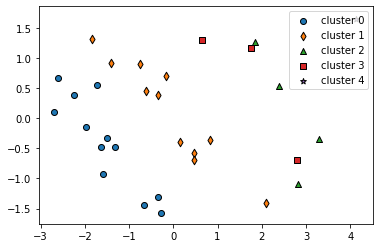

In [119]:
for label in unique_labels:
    label_cluster = df[df['meanshift_label'] == label]
    center = centers[label]
    plt.scatter(x=label_cluster['component1'], y=label_cluster['component2'], edgecolor='k', marker=markers[label])
    plt.legend(['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4'])
plt.show()

## LDA

In [120]:
df = pd.read_csv(r'D:\git_space\data\grade.csv')
df

,name,midterm,final,attendance,attitude,homework
0,Ronaldo,90,94,10,8,8
1,Son,85,90,10,9,8
2,Messi,98,97,10,9,10
3,Dybala,75,70,8,8,9
4,Griezmann,70,65,8,7,7
5,Benzema,82,90,8,7,7
6,Neymar,95,91,7,5,8
7,Mbappe,90,97,9,9,9
8,Sancho,64,70,7,8,9
9,Pogba,59,45,4,5,6


In [121]:
# 모든 평가 지표의 만점은 66점이므로 100점이 만점이 되도록 정규화
df['grade'] = (df['midterm']*0.3 + df['final']*0.3 + df['attendance']*0.1 + df['attitude']*0.1 + df['homework']*0.2) * (100 / 66)
df

,name,midterm,final,attendance,attitude,homework,grade
0,Ronaldo,90,94,10,8,8,88.787879
1,Son,85,90,10,9,8,84.848485
2,Messi,98,97,10,9,10,94.545455
3,Dybala,75,70,8,8,9,71.060606
4,Griezmann,70,65,8,7,7,65.757576
5,Benzema,82,90,8,7,7,82.575758
6,Neymar,95,91,7,5,8,88.787879
7,Mbappe,90,97,9,9,9,90.454545
8,Sancho,64,70,7,8,9,65.909091
9,Pogba,59,45,4,5,6,50.454545


In [122]:
# LDA 는 int으로 target을 받아와야 한다
df['grade'] = df['grade'].astype(int)

In [123]:
df.drop('name', axis=1, inplace=True)

In [124]:
features = df.drop('grade', axis=1, inplace=False)
target = df['grade']

In [125]:
df = pd.DataFrame(data=features, columns=['midterm','final','attendance','attitude','homework'])

In [126]:
df_scaled = StandardScaler().fit_transform(features) # data 정규화
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(df_scaled, target)
df_lda = lda.transform(df_scaled)

In [127]:
meanshift = MeanShift(bandwidth=18) # bandwidth를 18로 설정해보니 cluster가 다섯 개 형성된다
cluster_labels = meanshift.fit_predict(features)
print(np.unique(cluster_labels))

[0 1 2 3 4]


In [128]:
df['cluster'] = cluster_labels
df['component1'] = df_lda[:, 0]
df['component2'] = df_lda[:, 1]
df

,midterm,final,attendance,attitude,homework,cluster,component1,component2
0,90,94,10,8,8,0,99.413679,-1.593559
1,85,90,10,9,8,0,79.889114,-1.147530
2,98,97,10,9,10,0,123.492325,1.714791
3,75,70,8,8,9,1,12.617906,2.346220
4,70,65,8,7,7,1,-10.048579,-0.002727
5,82,90,8,7,7,0,72.094100,-3.607479
6,95,91,7,5,8,0,100.796044,-1.318513
7,90,97,9,9,9,0,106.026052,-0.784972
8,64,70,7,8,9,1,-10.312281,0.457181
9,59,45,4,5,6,3,-81.839232,0.642075


In [129]:
df['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 'd', '*', '^', 's']

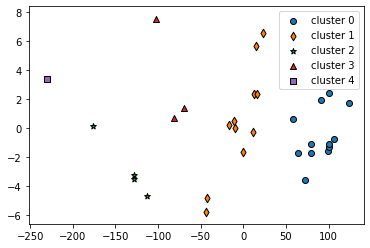

In [130]:
for label in unique_labels:
    label_cluster = df[df['meanshift_label'] == label]
    center = centers[label]
    plt.scatter(x=label_cluster['component1'], y=label_cluster['component2'], edgecolor='k', marker=markers[label])
    plt.legend(['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4'])
plt.show()